In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
LNGS = pd.read_hdf("Inputs/lngs_xe137_tonnepaper.h5")
SNOL = pd.read_hdf("Inputs/snolab_xe137_tonnepaper.h5")


In [2]:
LNGS = pd.read_hdf("Inputs/rock_lngs_xe137.h5")
SNOL = pd.read_hdf("Inputs/rock_sno_xe137.h5")

In [3]:
LNGS["NormFlux"]

0     0.421732
1     0.205748
2     0.116510
3     0.072195
4     0.047259
5     0.032130
6     0.023210
7     0.016921
8     0.012652
9     0.009759
10    0.007415
11    0.005915
12    0.004838
13    0.003966
14    0.003104
15    0.002748
16    0.002140
17    0.001926
18    0.001529
19    0.001438
20    0.001098
21    0.001042
22    0.000872
23    0.000761
24    0.000724
25    0.000567
26    0.000527
27    0.000505
28    0.000401
29    0.000369
Name: NormFlux, dtype: float64

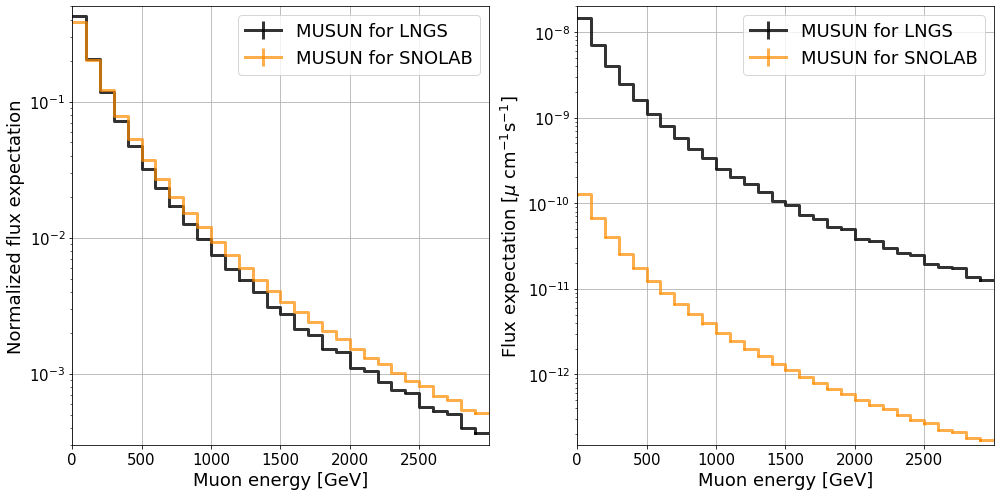

In [4]:
fig = plt.figure(figsize=(14,7))

ax1 = fig.add_subplot(121)
ax1.errorbar(LNGS["BinMin"], LNGS["NormFlux"],yerr=LNGS["FluxErr"],color='k',
             lw=3,alpha=0.8,drawstyle='steps-post',label='MUSUN for LNGS')
ax1.plot([LNGS["BinMin"][29],3000],[LNGS["NormFlux"][29],LNGS["NormFlux"][29]],color='k',lw=3,alpha=0.8)

ax1.errorbar(SNOL["BinMin"], SNOL["NormFlux"],yerr=SNOL["FluxErr"],color='darkorange',
             lw=3,alpha=0.7,drawstyle='steps-post',label='MUSUN for SNOLAB')
ax1.plot([SNOL["BinMin"][29],3000],[SNOL["NormFlux"][29],SNOL["NormFlux"][29]],color='darkorange',lw=3,alpha=0.7)


ax1.legend(loc='upper right',fontsize=18)
ax1.set_ylabel("Normalized flux expectation",fontsize=18)
ax1.set_xlabel("Muon energy [GeV]",fontsize=18)
ax1.tick_params(labelsize=15)
ax1.set_xlim(0,2999)
ax1.set_ylim(3e-4,0.5)
ax1.grid()
ax1.semilogy()


ax2 = fig.add_subplot(122)
ax2.errorbar(LNGS["BinMin"], LNGS["FluxPerCM2PerS"],yerr=LNGS["FluxAreaSErr"],color='k',
             lw=3,alpha=0.8,drawstyle='steps-post',label='MUSUN for LNGS')
ax2.plot([LNGS["BinMin"][29],3000],[LNGS["FluxPerCM2PerS"][29],LNGS["FluxPerCM2PerS"][29]],color='k',lw=3,alpha=0.8)

ax2.errorbar(SNOL["BinMin"], SNOL["FluxPerCM2PerS"],yerr=SNOL["FluxAreaSErr"],color='darkorange',
             lw=3,alpha=0.7,drawstyle='steps-post',label='MUSUN for SNOLAB')
ax2.plot([SNOL["BinMin"][29],3000],[SNOL["FluxPerCM2PerS"][29],SNOL["FluxPerCM2PerS"][29]],color='darkorange',lw=3,alpha=0.7)


ax2.legend(loc='upper right',fontsize=18)
ax2.set_ylabel(r"Flux expectation [$\mu$ cm$^{-1}$s$^{-1}$]",fontsize=18)
ax2.set_xlabel("Muon energy [GeV]",fontsize=18)
ax2.tick_params(labelsize=15)
ax2.semilogy()
ax2.set_xlim(0,2999)
ax2.set_ylim(1.5e-13,2e-8)
ax2.grid()

plt.tight_layout()
#plt.savefig("Cosmogenic_Flux.png",bbox_inches='tight',dpi=400)
#plt.savefig("Cosmogenic_Flux.pdf",bbox_inches='tight')
plt.show()


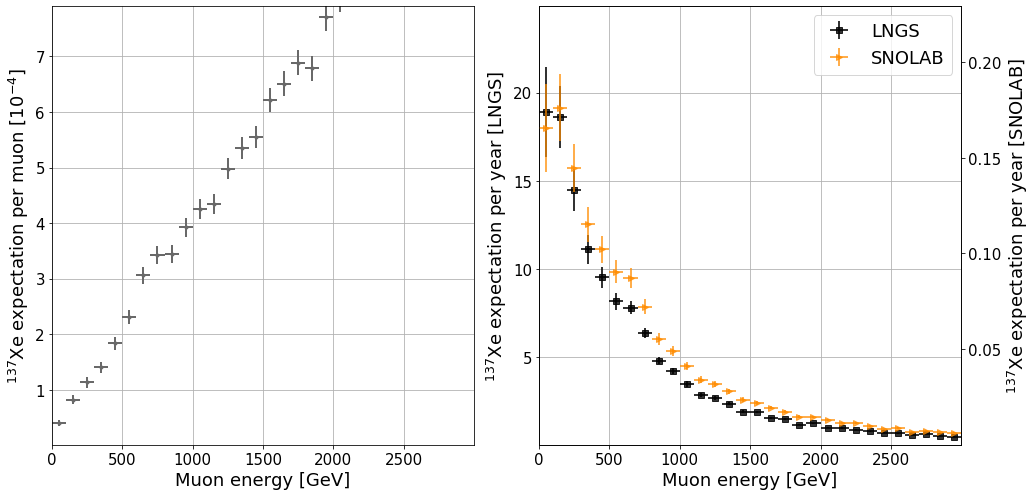

In [12]:
fig = plt.figure(figsize=(14.5,7))

ax1 = fig.add_subplot(121)
con = 1e4
ax1.errorbar(LNGS["BinMin"]+50, LNGS["xe137PerMu"]*con,yerr=LNGS["Err137PerMu"]*con,xerr=50,color='dimgrey',
             marker='.',lw=0,elinewidth=2)

lab= r"$^{137}$Xe expectation per muon [10$^{-4}$]"
ax1.set_ylabel(lab,fontsize=18)
ax1.set_xlabel("Muon energy [GeV]",fontsize=18)
ax1.tick_params(labelsize=15)
ax1.set_xlim(0,2999)
ax1.set_ylim(0.01,7.9)
ax1.grid()


ax2 = fig.add_subplot(122)
ax2.errorbar(LNGS["BinMin"]+50, LNGS["xe137PerY"],yerr=LNGS["xe137YErr"],xerr=50,color='k',
             marker='s',lw=0,elinewidth=2,label='LNGS',alpha=0.8,ms=6)

lab= r"$^{137}$Xe expectation per year [LNGS]"
ax2.set_ylabel(lab,fontsize=18)
ax2.set_xlabel("Muon energy [GeV]",fontsize=18)
ax2.tick_params(labelsize=15)
ax2.set_xlim(0,2999)
ax2.set_ylim(0.0001,24.9)
ax2.grid()

ax3 = ax2.twinx()
ax3.errorbar(SNOL["BinMin"]+50, SNOL["xe137PerY"],yerr=SNOL["xe137YErr"],xerr=50,color='darkorange',
             marker='>',lw=0,elinewidth=2,label='SNOLAB',alpha=0.7,ms=6)
lab= r"$^{137}$Xe expectation per year [SNOLAB]"
ax3.set_ylabel(lab,fontsize=18)
ax3.tick_params(labelsize=15)
ax3.set_ylim(0.0001,22.9*1e-2)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend( lines, labels, loc = 'upper right', fontsize=18)
plt.tight_layout()
#plt.savefig("Xe137_Expectation.png",bbox_inches='tight',dpi=400)
#plt.savefig("Xe137_Expectation.pdf",bbox_inches='tight')
plt.show()